In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)


In [3]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values  


## Splitting & Using SVM


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear')  

svm_classifier.fit(X_train, y_train)
test_score = svm_classifier.score(X_test, y_test)
y_pred = svm_classifier.predict(X_test)



In [5]:
# from sklearn.model_selection import cross_val_predict, KFold

# num_folds = 5
# svm_classifier = SVC(kernel='linear')
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# y_pred = cross_val_predict(svm_classifier, X, y, cv=kf)


## Using Evaluation Metrics

Accuracy =  90.66666666666666 %
Precision =  0.9041539291494336
Recall =  0.9067873303167421
F1-score =  0.9053030303030303


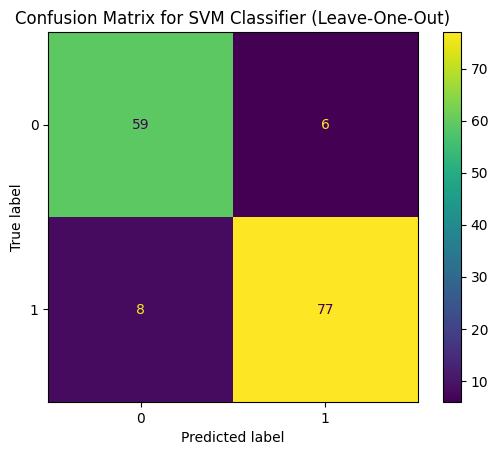

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        65
           1       0.93      0.91      0.92        85

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()